In [3]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from google.colab import files
import opendatasets as od

%matplotlib inline

In [5]:
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saratdantu
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:29<00:00, 83.4MB/s]


In [6]:
model = tf.keras.models.Sequential([

    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('normal') clas and 1 for ('pneumonia') class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# to get the summary of the model
model.summary()

# configure the model for traning by adding metrics
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,  # Rotate images randomly within the range of 20 degrees
    width_shift_range=0.1,  # Shift images horizontally within the range of 0.1
    height_shift_range=0.1,  # Shift images vertically within the range of 0.1
    shear_range=0.1,  # Apply shear transformation within the range of 0.1
    zoom_range=0.1,  # Zoom images randomly within the range of 0.1
    horizontal_flip=True  # Flip images horizontally
)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/chest-xray-pneumonia/chest_xray/chest_xray/train',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/chest-xray-pneumonia/chest_xray/chest_xray/val',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

# training the model
history = model.fit(
    train_generator,
    steps_per_epoch = 3,
    epochs = 3,
    validation_data = validation_generator
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/3
3/3 [==============================] - 62s 18s/step - loss: 0.5707 - accuracy: 0.7578 - val_loss: 0.6463 - val_accuracy: 0.6875
Epoch 2/3
3/3 [==============================] - 61s 19s/step - loss: 0.5189 - accuracy: 0.7760 - val_loss: 0.6622 - val_accuracy: 0.6250
Epoch 3/3
3/3 [==============================] - 65s 21s/step - loss: 0.5007 - accuracy: 0.7656 - val_loss: 0.6373 - val_accuracy: 0.6250


In [23]:
# load new unseen dataset
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
    '/content/chest-xray-pneumonia/chest_xray/chest_xray/test',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_generator, 624)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

Found 624 images belonging to 2 classes.


<ipython-input-23-834598b3137a>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = model.evaluate_generator(test_generator, 624)


loss rate at evaluation data : 0.4321640133857727
accuracy rate at evaluation data : 0.8541666865348816


In [24]:
from google.colab import files
uploaded = files.upload()

Saving IM-0117-0001.jpeg to IM-0117-0001.jpeg


1/1 [==============================] - 0s 56ms/step
[1.]
IM-0117-0001.jpeg is pneumonia


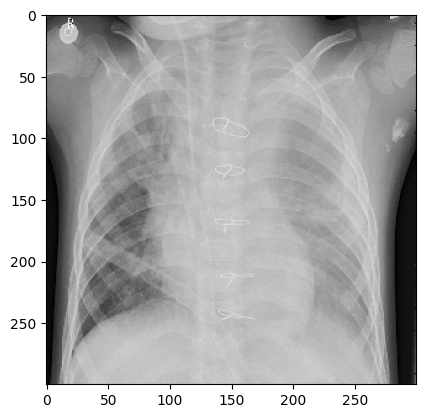

In [25]:
for fn in uploaded.keys():
  # predict images
  path = '/content/person3_bacteria_10.jpeg'
  img = tf.keras.utils.load_img(path, target_size=(300,300))
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0]> 0.5:
    print(fn + ' is pneumonia')
    plt.imshow(img)
  else:
    print(fn + 'is normal')
    plt.imshow(img)